In [8]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle
import numpy as np

# ancien model


# new new model 

In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

Modèle pour la classe 0 entraîné.
Modèle pour la classe 1 entraîné.
Modèle pour la classe 2 entraîné.
Modèle pour la classe 3 entraîné.
Modèle pour la classe 4 entraîné.
Modèle pour la classe 5 entraîné.
Modèle pour la classe 6 entraîné.
Modèle pour la classe 7 entraîné.
Modèle pour la classe 8 entraîné.
Modèle pour la classe 9 entraîné.
Accuracy sur les données de test : 89.75%

Classification Report :
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.90      0.96      0.93        47
           2       0.98      0.89      0.93        46
           3       0.92      0.94      0.93        36
           4       0.88      0.88      0.88        34
           5       0.85      0.82      0.84        34
           6       0.94      0.91      0.92        33
           7       0.80      0.84      0.82        44
           8       0.98      0.90      0.93        48
           9       0.80      0.83      0.81        4

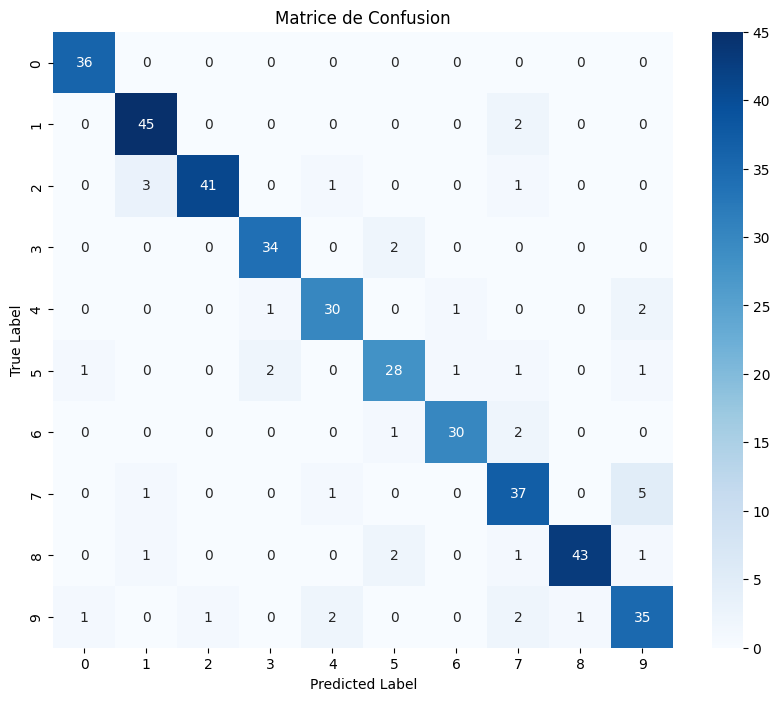

In [4]:
# Charger les données MNIST
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
y = y.astype(int)

# Réduire les données : 200 observations par classe
def reduce_data(X, y, samples_per_class=200):
    reduced_X = []
    reduced_y = []
    for label in np.unique(y):
        indices = np.where(y == label)[0][:samples_per_class]
        reduced_X.append(X[indices])
        reduced_y.append(y[indices])
    return np.vstack(reduced_X), np.hstack(reduced_y)

# Appliquer la réduction
X_reduced, y_reduced = reduce_data(X, y, samples_per_class=200)

# Diviser en données d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_reduced, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Retourner la taille des nouvelles données
X_train.shape, X_test.shape


# Entraîner les modèles One-vs-All
svm_models = []
for i in range(10):
    y_binary = np.where(y_train == i, 1, -1)  # Binariser les labels pour chaque classe
    model = SVC(kernel='rbf', C=1.0, gamma=0.001)
    model.fit(X_train, y_binary)
    svm_models.append(model)
    print(f"Modèle pour la classe {i} entraîné.")

# Fonction de prédiction One-vs-All
def predict_ova(models, X):
    decision_values = np.array([model.decision_function(X) for model in models])
    return np.argmax(decision_values, axis=0)

# Faire des prédictions sur les données de test
y_pred = predict_ova(svm_models, X_test)

# Évaluer les performances
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy sur les données de test : {accuracy * 100:.2f}%")

# Rapport détaillé
print("\nClassification Report :")
print(classification_report(y_test, y_pred))

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nMatrice de confusion :")
print(conf_matrix)
# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matrice de Confusion')
plt.show()


In [5]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
# Définir la grille d'hyperparamètres
param_grid = {
    'C': [0.1, 1, 10, 100],  # Paramètre de régularisation
    'gamma': [0.001, 0.01, 0.1, 1],  # Paramètre du noyau RBF
    'kernel': ['rbf']
}

# Configurer le modèle SVM avec GridSearchCV
grid_search = GridSearchCV(
    estimator=SVC(),
    param_grid=param_grid,
    scoring='accuracy',  # Évaluer la précision
    cv=3,  # Validation croisée à 3 plis
    verbose=1,
    n_jobs=-1  # Utilise tous les cœurs disponibles
)

# Ajuster le modèle sur les données
grid_search.fit(X_train, y_train)

# Résultats de la recherche
print("Meilleurs paramètres trouvés :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

# Évaluer le modèle optimal
best_model = grid_search.best_estimator_
y_predm = best_model.predict(X)
print(classification_report(y, y_predm))

Fitting 3 folds for each of 16 candidates, totalling 48 fits
Meilleurs paramètres trouvés : {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Meilleure précision : 0.8881241318895471
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      6903
           1       0.00      0.00      0.00      7877
           2       0.10      1.00      0.18      6990
           3       0.00      0.00      0.00      7141
           4       0.00      0.00      0.00      6824
           5       0.00      0.00      0.00      6313
           6       0.00      0.00      0.00      6876
           7       0.00      0.00      0.00      7293
           8       0.00      0.00      0.00      6825
           9       0.00      0.00      0.00      6958

    accuracy                           0.10     70000
   macro avg       0.01      0.10      0.02     70000
weighted avg       0.01      0.10      0.02     70000



/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/raniabouzroud/Desktop/analyse et visualisation de données/venv_global/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

In [6]:
# Récupérer les paramètres de chaque modèle SVM
for i, model in enumerate(svm_models):
    # Vecteurs supports
    support_vectors = model.support_vectors_
    
    # Coefficients associés aux vecteurs supports
    dual_coefficients = model.dual_coef_
    
    # Biais
    intercept = model.intercept_
    
    # Afficher les informations
    print(f"Classe {i} :")
    print(f" - Nombre de vecteurs supports : {support_vectors.shape[0]}")
    print(f" - Dual coefficients (shape): {dual_coefficients.shape}")
    print(f" - Biais : {intercept[0]}")
    print("===================================")
    



Classe 0 :
 - Nombre de vecteurs supports : 252
 - Dual coefficients (shape): (1, 252)
 - Biais : -0.9622111309184352
Classe 1 :
 - Nombre de vecteurs supports : 179
 - Dual coefficients (shape): (1, 179)
 - Biais : -1.1045662101129186
Classe 2 :
 - Nombre de vecteurs supports : 392
 - Dual coefficients (shape): (1, 392)
 - Biais : -0.6829055514200036
Classe 3 :
 - Nombre de vecteurs supports : 369
 - Dual coefficients (shape): (1, 369)
 - Biais : -0.7390838685043334
Classe 4 :
 - Nombre de vecteurs supports : 339
 - Dual coefficients (shape): (1, 339)
 - Biais : -0.9860184707218735
Classe 5 :
 - Nombre de vecteurs supports : 417
 - Dual coefficients (shape): (1, 417)
 - Biais : -0.8908719927220066
Classe 6 :
 - Nombre de vecteurs supports : 283
 - Dual coefficients (shape): (1, 283)
 - Biais : -0.7424879205757587
Classe 7 :
 - Nombre de vecteurs supports : 326
 - Dual coefficients (shape): (1, 326)
 - Biais : -0.5948579158208805
Classe 8 :
 - Nombre de vecteurs supports : 346
 - Dual 

### exportation des fichiers des paramètres

In [7]:
for i, model in enumerate(svm_models):
    # Exporter les vecteurs supports
    support_vectors = model.support_vectors_
    np.savetxt(f"data/vecteur_support_{i}.txt", support_vectors, fmt="%.6f")
    
    # Exporter les coefficients associés aux vecteurs supports
    dual_coefficients = model.dual_coef_
    np.savetxt(f"data/coefficients_{i}.txt", dual_coefficients, fmt="%.6f")
    
    # Exporter le biais (intercept)
    intercept = model.intercept_[0]
    with open(f"data/biais_{i}.txt", "w") as f:
        f.write(f"{intercept:.6f}")

print("Extraction terminée. Les fichiers ont été sauvegardés dans le dossier 'data'.")

Extraction terminée. Les fichiers ont été sauvegardés dans le dossier 'data'.
